# Predicting Hepatitis C Patients

**Outline:**

1. Data Preprocessing: Data cleaning, simple EDA, data scalling

2. Model Building: Logistic Regression, Random Forest, Gradient Boosting, Support Vector Machine

3. Model Evaluation: Accuracy, AUC-ROC, AUC-PRC
---

## Background

Hepatitis C is a viral infection specifically targeting the liver, potentially leading to severe and life-threatening liver damage if left untreated. This bloodborne virus, primarily transmitted through exposure to infected blood, can establish a chronic infection that may persist for years. In its chronic form, hepatitis C can quietly progress, often without noticeable symptoms, making early detection crucial for effective management. 

Diagnostic tools, such as liver function tests, play a pivotal role in assessing the health of the liver. These blood tests evaluate the levels of various enzymes and proteins, providing insights into the liver's performance in tasks like protein production and bilirubin clearance. Elevated levels of certain enzymes may indicate liver cell damage or disease, helping healthcare professionals monitor and address the progression of hepatitis C and its impact on liver function. Regular monitoring and timely intervention are essential components of managing hepatitis C to prevent long-term complications.

**Some important terminologies for this dataset:**

- Alanine transaminase (ALT): ALT is a liver enzyme responsible for converting proteins into energy, and elevated levels in the bloodstream may indicate liver damage or disease.
- Aspartate transaminase (AST): AST, also found in the liver, assists in amino acid metabolism; increased levels could signify liver damage, disease, or muscle injury.
- Alkaline phosphatase (ALP): ALP, present in the liver and bone, aids in protein breakdown, and elevated levels may suggest liver damage, bile duct obstruction, or certain bone diseases.
- Albumin (ALB) and Total Protein: Albumin, produced in the liver, is vital for immune function, and lower-than-normal levels may indicate liver damage or disease.
- Bilirubin: Bilirubin, a byproduct of red blood cell breakdown, passes through the liver, and elevated levels could signal liver damage, disease, or certain types of anemia.
- Gamma-glutamyltransferase (GGT): GGT is a blood enzyme, and higher-than-normal levels may indicate liver or bile duct damage.
- Acetylcholinesterase (AChE) is an enzyme pivotal in nerve signal transmission, breaking down acetylcholine and contributing to neuromuscular function.



## Attributes

The data set contains laboratory values of blood donors and Hepatitis C patients and demographic values like age. The data was obtained from [UCI Machine Learning Repository.](https://archive.ics.uci.edu/dataset/571/hcv+data)

Content
All attributes except Category and Sex are numerical.
- Attributes 1 to 4 refer to the data of the patient:
1. X (Patient ID/No.)
2. Category (diagnosis) (values: '0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis', '2=Fibrosis', '3=Cirrhosis')
3. Age (in years)
4. Sex (f,m)
- Attributes 5 to 14 refer to laboratory data:
5. ALB
6. ALP
7. ALT
8. AST
9. BIL
10. CHE
11. CHOL
12. CREA
13. GGT
14. PROT

The target attribute for classification is Category (2): blood donors vs. Hepatitis C patients (including its progress ('just' Hepatitis C, Fibrosis, Cirrhosis).

---
## Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('hcv_data.csv')
df

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,611,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,612,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,613,3=Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,614,3=Cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


### Data Cleaning

In [3]:
df = df.drop('Unnamed: 0', axis=1)

In [4]:
df

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,3=Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,3=Cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  615 non-null    object 
 1   Age       615 non-null    int64  
 2   Sex       615 non-null    object 
 3   ALB       614 non-null    float64
 4   ALP       597 non-null    float64
 5   ALT       614 non-null    float64
 6   AST       615 non-null    float64
 7   BIL       615 non-null    float64
 8   CHE       615 non-null    float64
 9   CHOL      605 non-null    float64
 10  CREA      615 non-null    float64
 11  GGT       615 non-null    float64
 12  PROT      614 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 62.6+ KB


In [6]:
print(df['Category'].unique())

['0=Blood Donor' '0s=suspect Blood Donor' '1=Hepatitis' '2=Fibrosis'
 '3=Cirrhosis']


In [7]:
#check missing data

df.isnull().sum()

Category     0
Age          0
Sex          0
ALB          1
ALP         18
ALT          1
AST          0
BIL          0
CHE          0
CHOL        10
CREA         0
GGT          0
PROT         1
dtype: int64

In [8]:
#impute missing data

df['ALB'].fillna(df['ALB'].mean(), inplace=True)
df['ALP'].fillna(df['ALP'].mean(), inplace=True)
df['ALT'].fillna(df['ALT'].mean(), inplace=True)
df['CHOL'].fillna(df['CHOL'].mean(), inplace=True)
df['PROT'].fillna(df['PROT'].mean(), inplace=True)

In [9]:
df.isnull().sum()

Category    0
Age         0
Sex         0
ALB         0
ALP         0
ALT         0
AST         0
BIL         0
CHE         0
CHOL        0
CREA        0
GGT         0
PROT        0
dtype: int64

In [10]:
#mapping the values

df['Category'] = df['Category'].map({'0=Blood Donor': 0, '0s=suspect Blood Donor': 0, 
                                     "1=Hepatitis" : 1, "2=Fibrosis" : 1, "3=Cirrhosis" : 1})

df['Sex'] = df['Sex'].map({'m': 0, 'f': 1})

In [11]:
df

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0,32,0,38.5,52.50000,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0,32,0,38.5,70.30000,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0,32,0,46.9,74.70000,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0,32,0,43.2,52.00000,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0,32,0,39.2,74.10000,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,1,62,1,32.0,416.60000,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,1,64,1,24.0,102.80000,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,1,64,1,29.0,87.30000,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,1,46,1,33.0,68.28392,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


---
### Simple EDA

<function matplotlib.pyplot.show(close=None, block=None)>

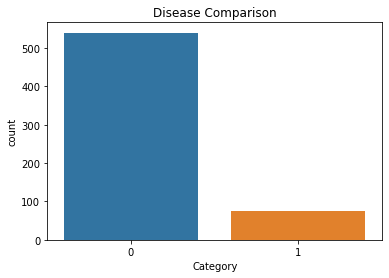

In [12]:
#check disease distribution

plt.figure()
sns.countplot(x='Category', data=df)
plt.title('Disease Comparison')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

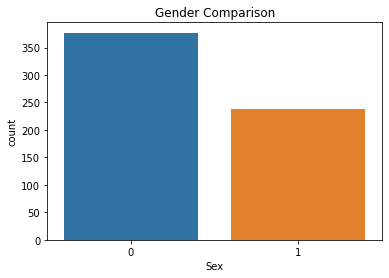

In [13]:
#check gender distribution

plt.figure()
sns.countplot(x='Sex', data=df)
plt.title('Gender Comparison')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

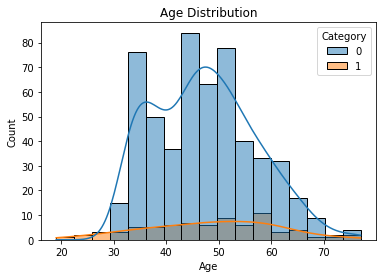

In [14]:
#check age distribution

plt.figure()
sns.histplot(data=df, x='Age', hue='Category', kde=True)
plt.title('Age Distribution')
plt.show

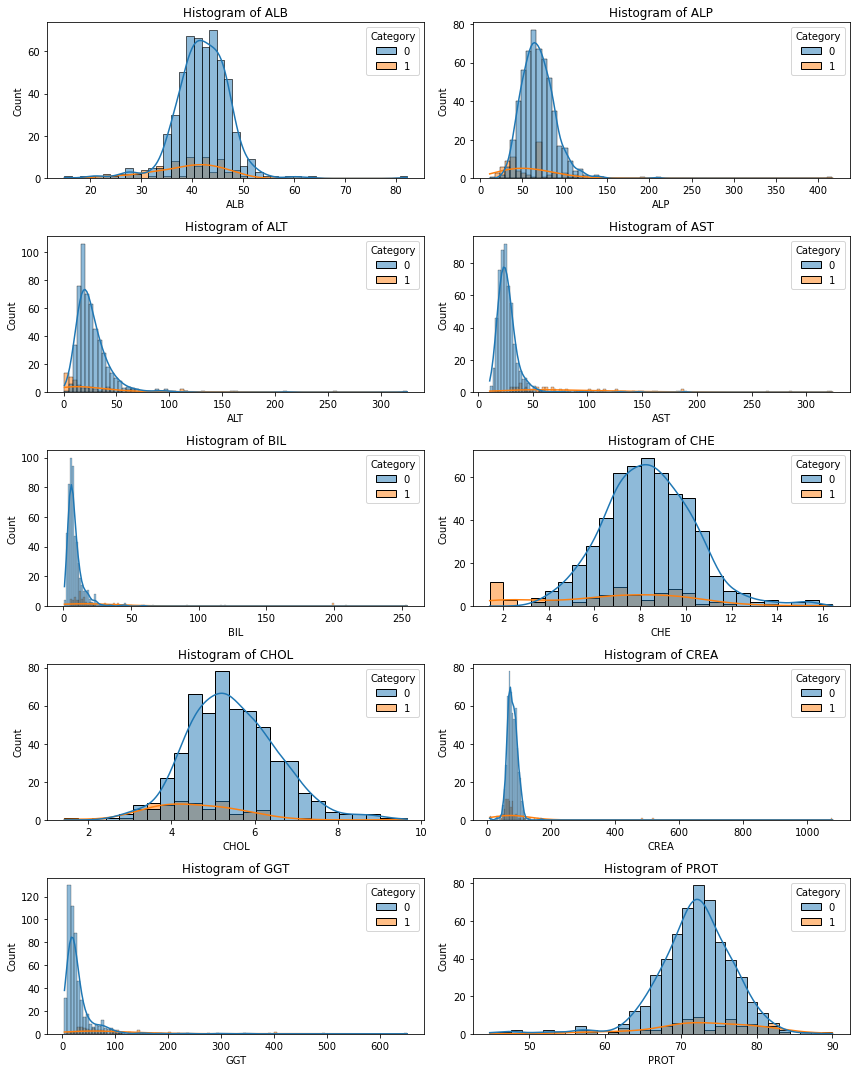

In [15]:
#check laboratory data distribution


fig, axes = plt.subplots(5, 2, figsize=(12, 15))
axes = axes.flatten()

columns = ['ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']

for i, column in enumerate(columns):
    sns.histplot(x=df[column], hue=df['Category'], kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram of {column}')

plt.tight_layout()
plt.show()

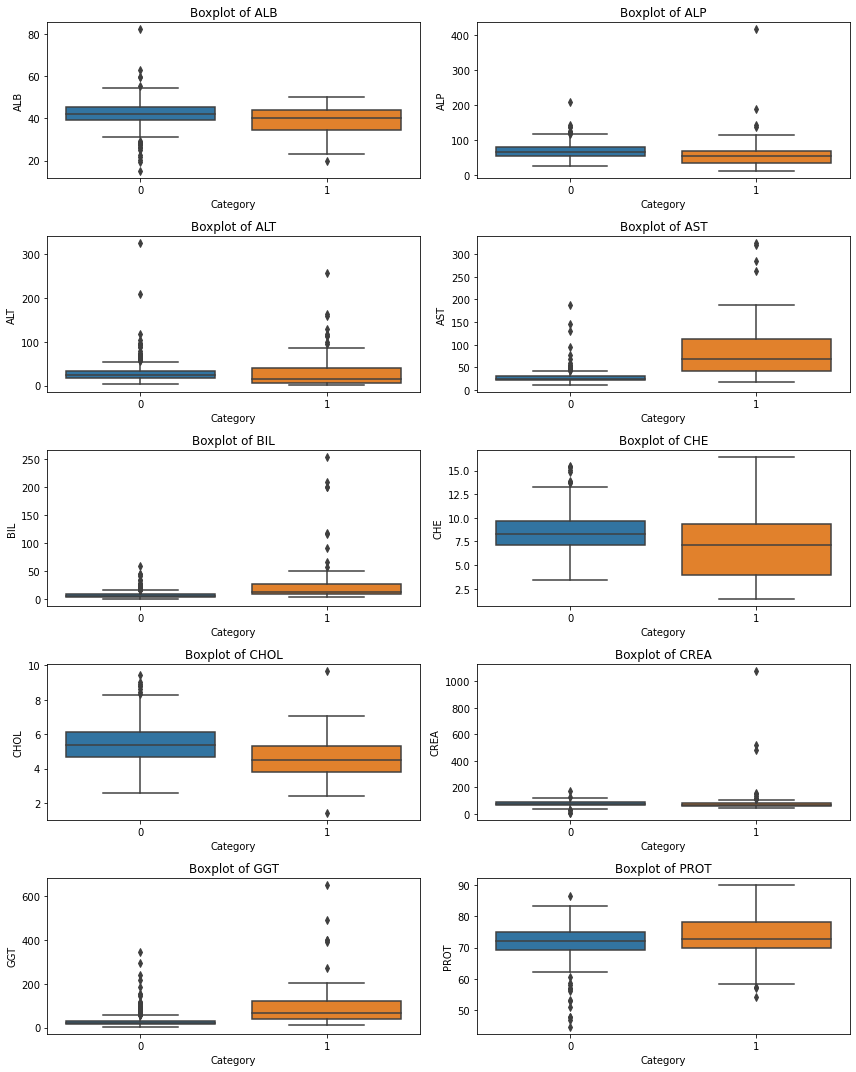

In [16]:
#check outliers

fig, axes = plt.subplots(5, 2, figsize=(12, 15))
axes = axes.flatten()

columns = ['ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']

for i, column in enumerate(columns):
    sns.boxplot(x=df['Category'], y=df[column], ax=axes[i])
    axes[i].set_title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

<AxesSubplot:>

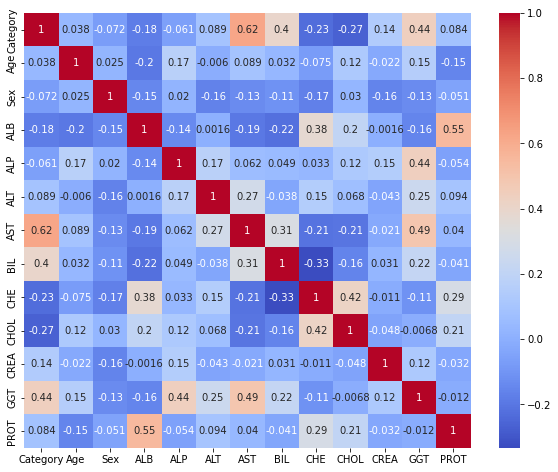

In [17]:
#create correlation matrix

fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cbar=True, cmap='coolwarm')

---
### Scaling Data

In [18]:
from sklearn.preprocessing import RobustScaler

robust_scaler = RobustScaler()

cols_to_scale = ['ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']

scaled_data = robust_scaler.fit_transform(df[cols_to_scale])

df_scaled = pd.DataFrame(scaled_data, columns=cols_to_scale)

df[cols_to_scale] = df_scaled

In [19]:
df

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0,32,0,-0.531250,-0.538899,-0.918919,-0.336283,0.033898,-0.500942,-1.449477,1.380952,-0.457143,-0.524590
1,0,32,0,-0.531250,0.136622,-0.300300,-0.106195,-0.576271,1.096045,-0.355401,-0.142857,-0.314286,0.704918
2,0,32,0,0.781250,0.303605,0.792793,2.362832,-0.203390,0.218456,-0.076655,0.428571,0.404082,1.163934
3,0,32,0,0.203125,-0.557875,0.456456,-0.292035,1.966102,-0.350282,-0.397213,0.142857,0.428571,0.573770
4,0,32,0,-0.421875,0.280835,0.576577,-0.097345,0.389831,0.335217,-0.689895,-0.047619,0.269388,-0.573770
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,1,62,1,-1.546875,13.278937,-1.027027,7.469027,7.237288,-1.013183,0.689895,-1.014286,25.616327,-0.606557
611,1,64,1,-2.796875,1.370019,-1.207207,1.637168,2.152542,-2.531073,-1.595819,-0.666667,0.514286,-0.147541
612,1,64,1,-2.015625,0.781784,-1.171171,6.469027,6.898305,-2.485876,-1.170732,-0.490476,1.669388,1.606557
613,1,46,1,-1.390625,0.060111,0.960961,3.194690,2.152542,-1.770245,-0.773519,-1.190476,1.089796,-0.196721


In [20]:
#train data

from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

X = df.drop("Category", axis=1)
y = df["Category"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [21]:
len(X_train), len(X_test)

(492, 123)

## Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

In [23]:
#GridSearch on LR

lr_model = LogisticRegression()
lr_params = {
    "penalty": ["l2"],
    "C": [0.01, 0.1, 1, 10],
    "max_iter": [500]
}

grid_search_lr = GridSearchCV(lr_model, lr_params, scoring='accuracy', cv=5)
grid_search_lr.fit(X_train, y_train)

best_lr_model = grid_search_lr.best_estimator_
y_pred_lr = best_lr_model.predict(X_test)

accuracy_lr = accuracy_score(y_test, y_pred_lr)

print("Logistic Regression")
print(f"Best parameters: {grid_search_lr.best_params_}")
print(f"Accuracy: {accuracy_lr}")

Logistic Regression
Best parameters: {'C': 10, 'max_iter': 500, 'penalty': 'l2'}
Accuracy: 0.9024390243902439


In [24]:
#Training using best hyperparameter

lr_model = LogisticRegression(C=10, penalty='l2', max_iter=500)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

accuracy_lr = accuracy_score(y_test, y_pred_lr)
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
classification_rep_lr = classification_report(y_test, y_pred_lr)

print("Logistic Regression")
print(f"Best Model Accuracy: {accuracy_lr:.3f}")
print("Best Model Confusion Matrix:")
print(conf_matrix_lr)
print("Best Model Classification Report:")
print(classification_rep_lr)

Logistic Regression
Best Model Accuracy: 0.902
Best Model Confusion Matrix:
[[97  2]
 [10 14]]
Best Model Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94        99
           1       0.88      0.58      0.70        24

    accuracy                           0.90       123
   macro avg       0.89      0.78      0.82       123
weighted avg       0.90      0.90      0.89       123



---
## Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
#GridSearch on RF

rfc_model = RandomForestClassifier()
rfc_params = {
    "n_estimators": [100, 200, 300],
    "max_depth": [5, 10, 20, None]
}

grid_search_rfc = GridSearchCV(rfc_model, rfc_params, scoring='accuracy', cv=5)
grid_search_rfc.fit(X_train, y_train)

best_rfc_model = grid_search_rfc.best_estimator_
y_pred_rfc = best_rfc_model.predict(X_test)

accuracy_rfc = accuracy_score(y_test, y_pred_rfc)

print("Random Forest")
print(f"Best parameters: {grid_search_rfc.best_params_}")
print(f"Accuracy: {accuracy_rfc}")

Random Forest
Best parameters: {'max_depth': 20, 'n_estimators': 300}
Accuracy: 0.926829268292683


In [27]:
#Training using best hyperparameter

rfc_model = RandomForestClassifier(max_depth=20, n_estimators=200)
rfc_model.fit(X_train, y_train)
y_pred_rfc = rfc_model.predict(X_test)

accuracy_rfc = accuracy_score(y_test, y_pred_rfc)
conf_matrix_rfc = confusion_matrix(y_test, y_pred_rfc)
classification_rep_rfc = classification_report(y_test, y_pred_rfc)

print("Random Forest")
print(f"Best Model Accuracy: {accuracy_rfc:.3f}")
print("Best Model Confusion Matrix:")
print(conf_matrix_rfc)
print("Best Model Classification Report:")
print(classification_rep_rfc)

Random Forest
Best Model Accuracy: 0.919
Best Model Confusion Matrix:
[[98  1]
 [ 9 15]]
Best Model Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95        99
           1       0.94      0.62      0.75        24

    accuracy                           0.92       123
   macro avg       0.93      0.81      0.85       123
weighted avg       0.92      0.92      0.91       123



---
## Gradient Boosting

In [28]:
from sklearn.ensemble import GradientBoostingClassifier

In [29]:
#GridSearch on GB

gb_model = GradientBoostingClassifier()
gb_params = {
    "n_estimators": [100, 200, 300],
    "learning_rate": [0.01, 0.1, 1],
    "max_depth": [3, 5, 10]
}

grid_search_gb = GridSearchCV(gb_model, gb_params, scoring='accuracy', cv=5)
grid_search_gb.fit(X_train, y_train)

best_gb_model = grid_search_gb.best_estimator_
y_pred_gb = best_gb_model.predict(X_test)

accuracy_gb = accuracy_score(y_test, y_pred_gb)

print("Gradient Boosting")
print(f"Best parameters: {grid_search_gb.best_params_}")
print(f"Accuracy: {accuracy_gb}")

Gradient Boosting
Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}
Accuracy: 0.9349593495934959


In [30]:
#Training using best hyperparameter

gb_model = GradientBoostingClassifier(learning_rate=0.1, max_depth=3, n_estimators=300)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

accuracy_gb = accuracy_score(y_test, y_pred_gb)
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
classification_rep_gb = classification_report(y_test, y_pred_gb)

print("Gradient Boosting")
print(f"Best Model Accuracy: {accuracy_gb:.3f}")
print("Best Model Confusion Matrix:")
print(conf_matrix_gb)
print("Best Model Classification Report:")
print(classification_rep_gb)

Gradient Boosting
Best Model Accuracy: 0.935
Best Model Confusion Matrix:
[[99  0]
 [ 8 16]]
Best Model Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        99
           1       1.00      0.67      0.80        24

    accuracy                           0.93       123
   macro avg       0.96      0.83      0.88       123
weighted avg       0.94      0.93      0.93       123



---
## Support Vector Machine

In [31]:
from sklearn.svm import SVC

In [32]:
#GridSearch on SVC

svc_model = SVC()
svc_params = {
    "C": [0.01, 0.1, 1, 10],
    "kernel": ["linear", "rbf", "sigmoid"],
    "gamma": ["scale", "auto"]
}

grid_search_svc = GridSearchCV(svc_model, svc_params, scoring='accuracy', cv=5)
grid_search_svc.fit(X_train, y_train)

best_svc_model = grid_search_svc.best_estimator_
y_pred_svc = best_svc_model.predict(X_test)

accuracy_svc = accuracy_score(y_test, y_pred_svc)

print("Support Vector Machine")
print(f"Best parameters: {grid_search_svc.best_params_}")
print(f"Accuracy: {accuracy_svc}")

Support Vector Machine
Best parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Accuracy: 0.9024390243902439


In [33]:
#Training using best hyperparameter

svc_model = SVC(C=10, gamma='scale', kernel='linear')
svc_model.fit(X_train, y_train)
y_pred_svc = svc_model.predict(X_test)

accuracy_svc = accuracy_score(y_test, y_pred_svc)
conf_matrix_svc = confusion_matrix(y_test, y_pred_svc)
classification_rep_svc = classification_report(y_test, y_pred_svc)

print("Support Vector Machine")
print(f"Best Model Accuracy: {accuracy_svc:.3f}")
print("Best Model Confusion Matrix:")
print(conf_matrix_svc)
print("Best Model Classification Report:")
print(classification_rep_svc)

Support Vector Machine
Best Model Accuracy: 0.902
Best Model Confusion Matrix:
[[97  2]
 [10 14]]
Best Model Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94        99
           1       0.88      0.58      0.70        24

    accuracy                           0.90       123
   macro avg       0.89      0.78      0.82       123
weighted avg       0.90      0.90      0.89       123



---
## Model Accuracy Comparison

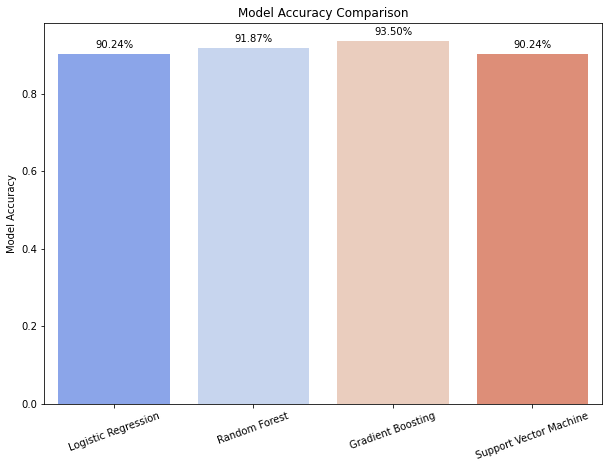

In [34]:
x = ['Logistic Regression',
     'Random Forest',
     'Gradient Boosting',
     'Support Vector Machine']

y = [accuracy_lr, 
     accuracy_rfc, 
     accuracy_gb, 
     accuracy_svc]

fig, ax = plt.subplots(figsize=(10,7))
sns.barplot(x=x,y=y, palette='coolwarm')
plt.ylabel("Model Accuracy")
plt.xticks(rotation=20)
plt.title("Model Accuracy Comparison")

for i, v in enumerate(y):
    ax.text(i, v + 0.01, f'{v*100:.2f}%', ha='center', va='bottom', fontsize=10)

plt.show()

## Confusion Matrix

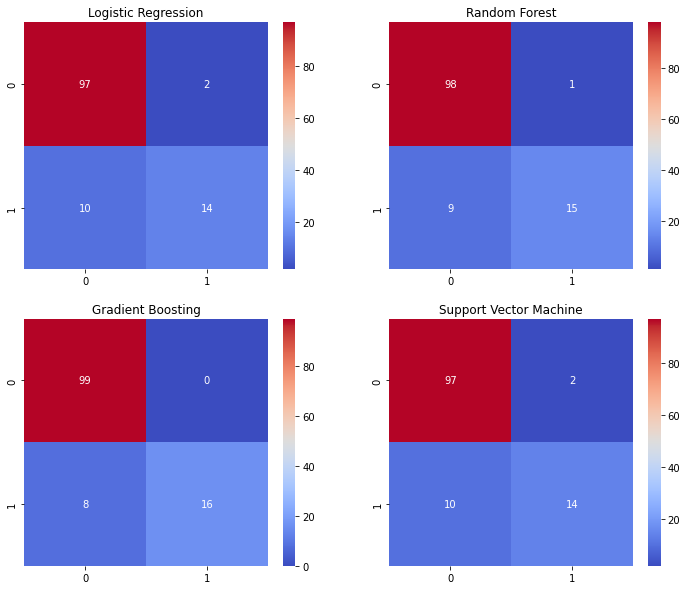

In [35]:
models = ['Logistic Regression',
          'Random Forest',
          'Gradient Boosting',
          'Support Vector Machine']

predictions = [y_pred_lr,
               y_pred_rfc,
               y_pred_gb,
               y_pred_svc]

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for i, model in enumerate(models):
    row = i // 2
    col = i % 2
    
    cf_matrix = confusion_matrix(y_test, predictions[i])
    sns.heatmap(cf_matrix, annot=True, cmap='coolwarm', ax=axes[row, col])
    axes[row, col].set_title(model)

plt.show()

---

## AUC-ROC & AUC-PRC

In [36]:
from sklearn.metrics import roc_auc_score, average_precision_score, roc_curve, precision_recall_curve

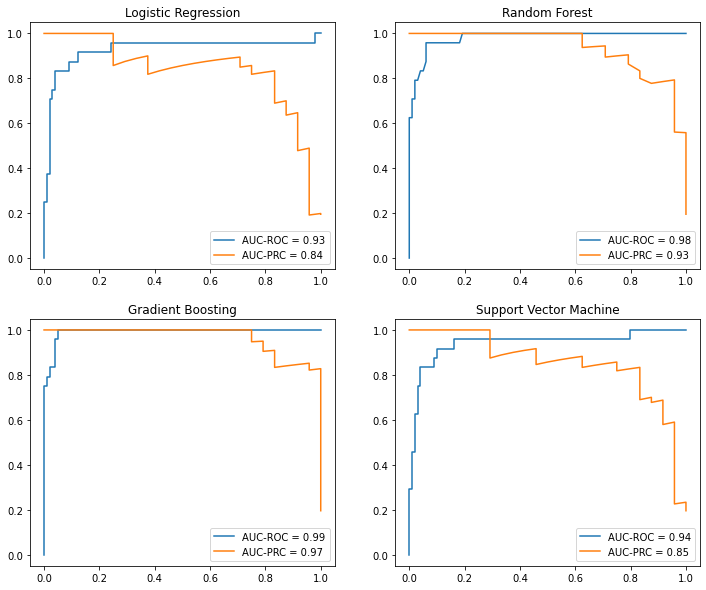

In [37]:
y_scores_lr = best_lr_model.decision_function(X_test)
y_scores_rfc = best_rfc_model.predict_proba(X_test)[:, 1]
y_scores_gb = best_gb_model.decision_function(X_test)
y_scores_svc = best_svc_model.decision_function(X_test)

models = ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'Support Vector Machine']
scores = [y_scores_lr, y_scores_rfc, y_scores_gb, y_scores_svc]

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for i, model in enumerate(models):
    row = i // 2
    col = i % 2
    
    # Calculate AUC for ROC
    auc_roc = roc_auc_score(y_test, scores[i])
    fpr, tpr, _ = roc_curve(y_test, scores[i])
    
    # Plot ROC curve
    axes[row, col].plot(fpr, tpr, label=f'AUC-ROC = {auc_roc:.2f}')
    
    # Calculate AUC for Precision-Recall Curve
    auc_prc = average_precision_score(y_test, scores[i])
    precision, recall, _ = precision_recall_curve(y_test, scores[i])
    
    # Plot Precision-Recall Curve
    axes[row, col].plot(recall, precision, label=f'AUC-PRC = {auc_prc:.2f}')
    
    axes[row, col].set_title(model)
    axes[row, col].legend()

plt.show()

---
## Export Model

In [38]:
import pickle

with open('hep_c_gb_model.pkl', 'wb') as file:
    pickle.dump(gb_model, file)

---
## Try: Load Model & Predict

In [39]:
with open('hep_c_gb_model.pkl', 'rb') as file:
    loaded_gb_model = pickle.load(file)

In [40]:
loaded_gb_model

GradientBoostingClassifier(n_estimators=300)

In [41]:
Y_predicted_loaded_model = loaded_gb_model.predict(X_test)

In [42]:
confusion_matrix(y_test, Y_predicted_loaded_model)

array([[99,  0],
       [ 8, 16]])

In [43]:
print(classification_report(y_test, Y_predicted_loaded_model))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        99
           1       1.00      0.67      0.80        24

    accuracy                           0.93       123
   macro avg       0.96      0.83      0.88       123
weighted avg       0.94      0.93      0.93       123



In [44]:
prediction = loaded_gb_model.predict(X_test)
prediction

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [45]:
y_test

248    0
365    0
432    0
610    1
132    0
      ..
281    0
291    0
250    0
11     0
336    0
Name: Category, Length: 123, dtype: int64